In [40]:
import pandas as pd

df_raw = pd.read_csv('vgames2.csv')

df = df_raw.dropna() # 결측치 있는 행 제거

# 2020년 게임 데이터 삭제
index_2020 = df[df['Year'] == 2020.0].index
df = df.drop(index_2020)

df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16240 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16240 non-null  int64  
 1   Name         16240 non-null  object 
 2   Platform     16240 non-null  object 
 3   Year         16240 non-null  float64
 4   Genre        16240 non-null  object 
 5   Publisher    16240 non-null  object 
 6   NA_Sales     16240 non-null  object 
 7   EU_Sales     16240 non-null  object 
 8   JP_Sales     16240 non-null  object 
 9   Other_Sales  16240 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.4+ MB


In [42]:
def clean_year(v):
  if v < 1900:
    return None
  else:
    return v

df['Year'] = df['Year'].apply(clean_year)
df = df.dropna()
df.shape

(16140, 10)

In [43]:
#str이 숫자변환되는지 확인하는 함수
def is_number(num):
    try:
        float(num)
        return True #num을 float으로 변환할 수 있는 경우
    except ValueError: #num을 float으로 변환할 수 없는 경우
        return False

# str상태에서 기본단위를 1000을 곱해주고 다시 str으로 변환하는 함수
def M_to_K(n):
  if is_number(n) == True:
    return str(float(n) * 1000)
  else:
    return n

In [44]:
# str상태의 K와 M을 숫자로 바꿔서 곱해주는 함수
def text_to_num(text, bad_data_val = 0):
  d = {
      'K': 1,
      'M': 1000
  }
  if not isinstance(text, str):
      # Non-strings are bad are missing data in poster's submission
      return bad_data_val

  elif text[-1] in d:
      # separate out the K, M, or B
      num, magnitude = text[:-1], text[-1]
      return int(float(num) * d[magnitude])
  else:
      return float(text)

In [45]:
for i in range(6, 10):
  df.iloc[:, i] = df.iloc[:, i].apply(M_to_K)
  df.iloc[:, i] = df.iloc[:, i].apply(text_to_num)
df.head(12)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40.0,0.0,0.0,0.0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170.0,0.0,0.0,10.0
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,20.0,0.0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40.0,0.0,0.0,0.0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120.0,90.0,0.0,40.0
5,6,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0.0,0.0,140.0,0.0
6,7,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,20.0,10.0,0.0,0.0
7,8,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,70.0,0.0,110.0,10.0
8,9,Imabikisou,PS3,2007.0,Adventure,Sega,0.0,0.0,40.0,0.0
9,10,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,40.0,30.0,0.0,10.0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16140 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16140 non-null  int64  
 1   Name         16140 non-null  object 
 2   Platform     16140 non-null  object 
 3   Year         16140 non-null  float64
 4   Genre        16140 non-null  object 
 5   Publisher    16140 non-null  object 
 6   NA_Sales     16140 non-null  float64
 7   EU_Sales     16140 non-null  float64
 8   JP_Sales     16140 non-null  float64
 9   Other_Sales  16140 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.4+ MB


In [47]:
# from google.colab import files

# df.to_csv('project1.csv')
# files.download('project1.csv')

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

region = df.loc[:, 'NA_Sales':'Other_Sales']
region.insert(0, 'Genre',df['Genre'])
region.head()

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,40.0,0.0,0.0,0.0
1,Action,170.0,0.0,0.0,10.0
2,Adventure,0.0,0.0,20.0,0.0
3,Misc,40.0,0.0,0.0,0.0
4,Platform,120.0,90.0,0.0,40.0


In [49]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [50]:
import matplotlib as mpl

# Windows 한글폰트
mpl.rc("font", family='Malgun Gothic')
plt.rc('font', family='NanumBarunGothic') 

In [51]:
grouped_NA = region['NA_Sales'].groupby(region['Genre'])
grouped_EU = region['EU_Sales'].groupby(region['Genre'])
grouped_JP = region['JP_Sales'].groupby(region['Genre'])
grouped_Other = region['Other_Sales'].groupby(region['Genre'])

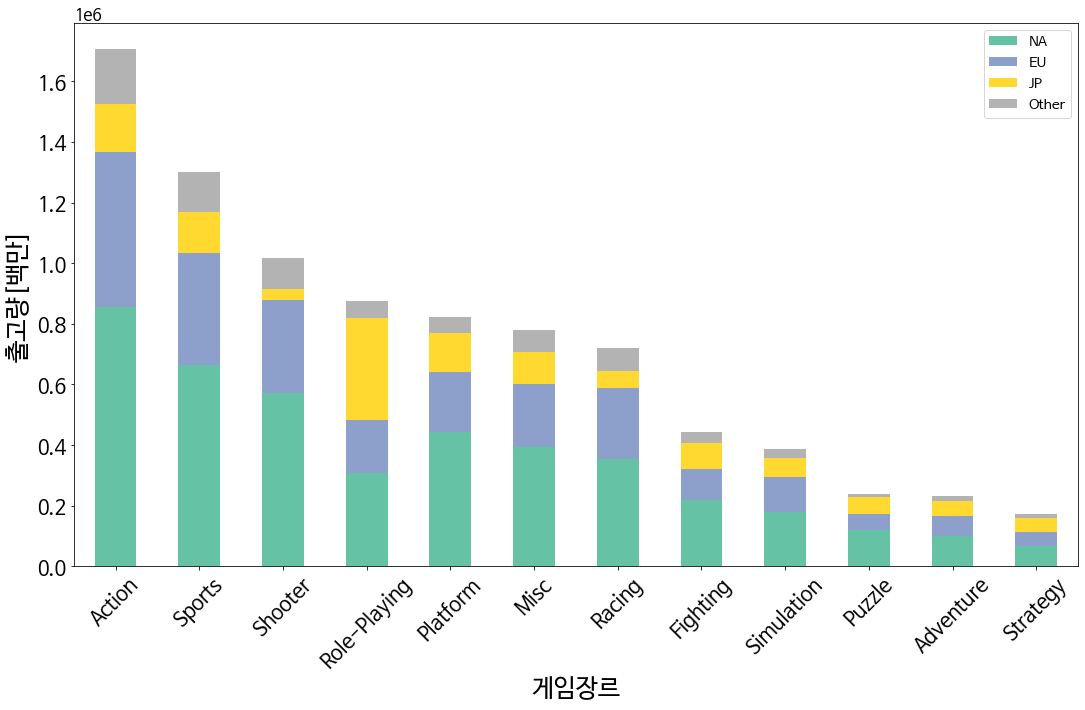

In [52]:
sales_NA = grouped_NA.sum()
sales_EU = grouped_EU.sum()
sales_JP = grouped_JP.sum()
sales_Other = grouped_Other.sum()

sales_stack = pd.DataFrame()
sales_stack['NA'] = sales_NA
sales_stack['EU'] = sales_EU
sales_stack['JP'] = sales_JP
sales_stack['Other'] = sales_Other

# 모든 지역 Sales합계를 순위별로 정렬
temp3 = sales_stack.sum(axis=1)
temp4 = sales_stack
temp4['sum'] = temp3
temp4 = temp4.sort_values(by=['sum'], ascending=False)
sales_stack = temp4.drop(['sum'], axis=1)

sales_stack.plot(kind='bar', stacked=True, figsize=[18, 10], fontsize=20, colormap='Set2')
plt.xlabel("게임장르", fontsize=25)
plt.ylabel("출고량[백만]", fontsize=25)
plt.xticks(rotation=45)
# plt.title('게임장르별 출고량', fontsize=30)
plt.legend(["NA", "EU", "JP", "Other"], fontsize=14)

In [53]:
# Sales기준으로 정렬한 장르순서 헤더로 저장
header = sales_stack.transpose().columns.tolist()

In [54]:
# 지역별 장르 출고량을 비율로 변환
percent_NA = grouped_NA.sum() / grouped_NA.sum().sum()
percent_EU = grouped_EU.sum() / grouped_EU.sum().sum()
percent_JP = grouped_JP.sum() / grouped_JP.sum().sum()
percent_Other = grouped_Other.sum() / grouped_Other.sum().sum()

In [55]:
percent_stack = pd.DataFrame()
percent_stack['NA'] = percent_NA
percent_stack['EU'] = percent_EU
percent_stack['JP'] = percent_JP
percent_stack['Other'] = percent_Other

percent_stackT = percent_stack.transpose()
percent_stackT = percent_stackT[header]
percent_stackT

Genre,Action,Sports,Shooter,Role-Playing,Platform,Misc,Racing,Fighting,Simulation,Puzzle,Adventure,Strategy
NA,0.200009,0.155231,0.133398,0.071754,0.103388,0.092132,0.082617,0.051432,0.042240,0.028274,0.023677,0.015847
EU,0.215537,0.155471,0.129216,0.074146,0.083857,0.087339,0.098492,0.041937,0.047387,0.021191,0.026629,0.018798
JP,0.123771,0.106961,0.029677,0.267245,0.102701,0.082427,0.044047,0.068661,0.050437,0.044659,0.041162,0.038253
Other,0.235929,0.169238,0.129527,0.070288,0.065714,0.093195,0.097935,0.046379,0.040109,0.015918,0.021378,0.014389


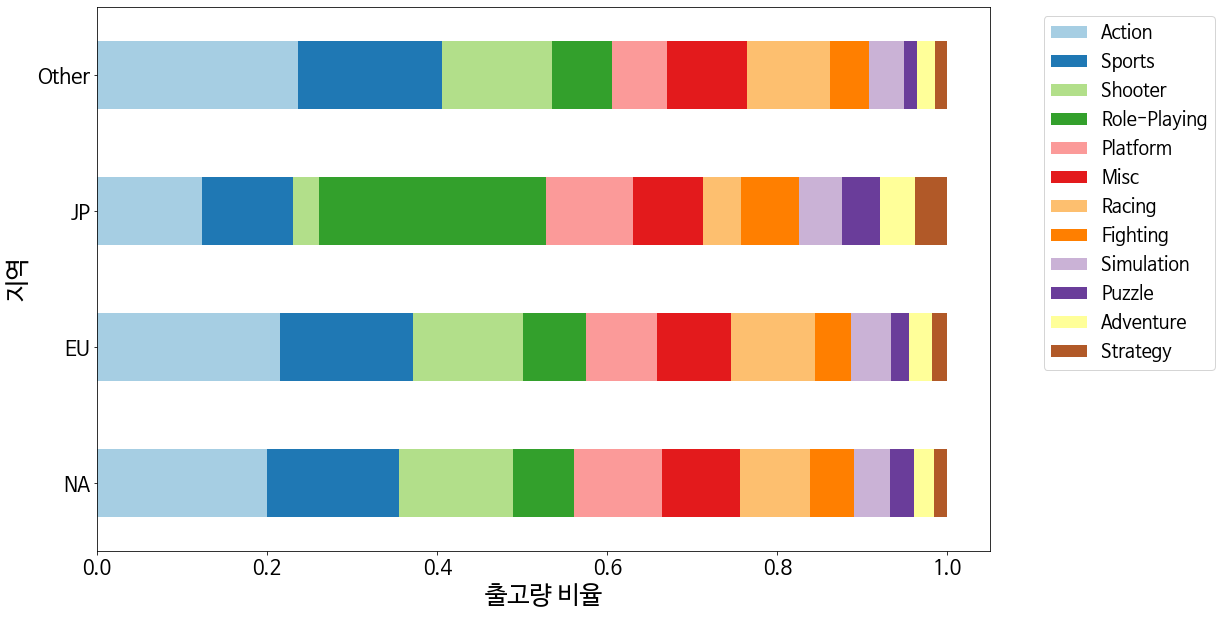

In [56]:
percent_stackT.plot(kind='barh', stacked=True, figsize=[16, 10], fontsize=20, colormap='Paired')
plt.xlabel("출고량 비율", fontsize=25)
plt.ylabel("지역", fontsize=25)
# plt.title('지역별 게임장르의 출고량 비율', fontsize=30)

plt.legend(header, fontsize=18, bbox_to_anchor=(1.05, 1), loc='upper left')

In [57]:
region

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,40.0,0.0,0.0,0.0
1,Action,170.0,0.0,0.0,10.0
2,Adventure,0.0,0.0,20.0,0.0
3,Misc,40.0,0.0,0.0,0.0
4,Platform,120.0,90.0,0.0,40.0
...,...,...,...,...,...
16593,Platform,150.0,40.0,0.0,10.0
16594,Action,10.0,0.0,0.0,0.0
16595,Sports,440.0,190.0,30.0,130.0
16596,Action,50.0,50.0,250.0,30.0


In [58]:
trend = df.loc[:, 'Platform':'Other_Sales']
trend = trend.drop(['Publisher'], axis=1)
trend

,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,DS,2008.0,Action,40.0,0.0,0.0,0.0
1,Wii,2009.0,Action,170.0,0.0,0.0,10.0
2,PSP,2010.0,Adventure,0.0,0.0,20.0,0.0
3,DS,2010.0,Misc,40.0,0.0,0.0,0.0
4,PS3,2010.0,Platform,120.0,90.0,0.0,40.0
...,...,...,...,...,...,...,...
16593,GC,2006.0,Platform,150.0,40.0,0.0,10.0
16594,PSP,2005.0,Action,10.0,0.0,0.0,0.0
16595,PS3,2015.0,Sports,440.0,190.0,30.0,130.0
16596,PSV,2013.0,Action,50.0,50.0,250.0,30.0


In [59]:
import numpy as np

# 연도만 추출하기
year_only = pd.DataFrame()
year_only.insert(0, 'Year', np.sort(trend['Year'].unique()))
year_only = year_only.set_index(year_only['Year'])

outer = year_only


# 장르별로 개수 구해서 DataFrame으로 저장하고 concat으로 병합하기
for i in header:
  is_Genre = trend['Genre'] == i
  temp_G = trend[is_Genre]
  temp_G = temp_G['Year'].value_counts().sort_index()
  A = temp_G.to_frame()
  A.columns = [i]

  outer = pd.concat([outer, A], join='outer',axis=1)

outer = outer.fillna(0)
outer = outer.drop(['Year'], axis=1)
outer.head()

,Action,Sports,Shooter,Role-Playing,Platform,Misc,Racing,Fighting,Simulation,Puzzle,Adventure,Strategy
1980.0,1,0.0,2.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0
1981.0,25,4.0,10.0,0.0,3.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0
1982.0,18,2.0,5.0,0.0,5.0,1.0,2.0,0.0,0.0,3.0,0.0,0.0
1983.0,7,1.0,1.0,0.0,5.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1984.0,1,2.0,3.0,0.0,1.0,1.0,3.0,0.0,0.0,3.0,0.0,0.0


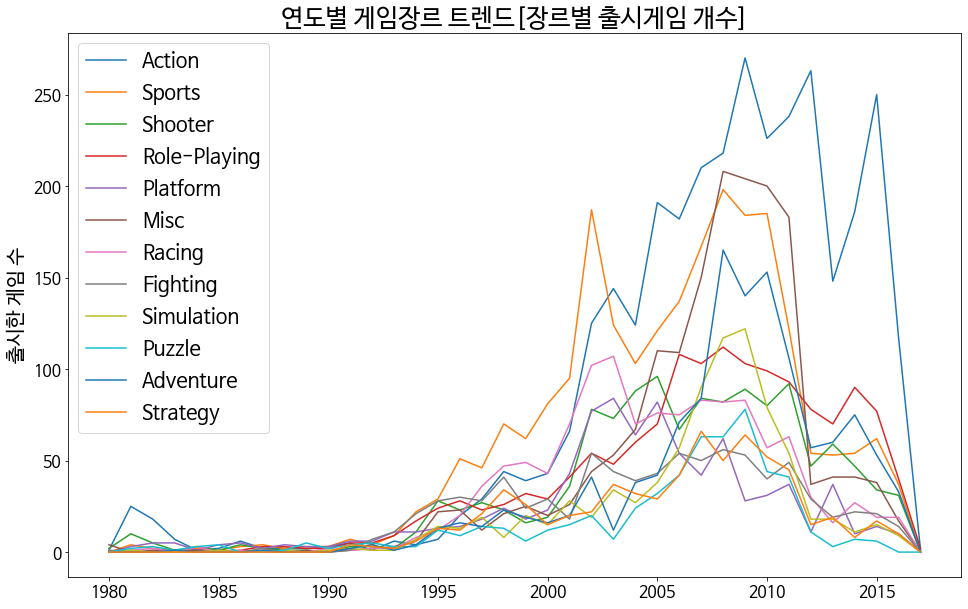

In [60]:
plt.figure(figsize=(16, 10))
plt.rc('ytick', labelsize=16)
plt.rc('xtick', labelsize=16)

for j in header:
  plt.plot(outer.index, outer[j])

# plt.xlabel("년도", fontsize=15)
plt.ylabel("출시한 게임 수", fontsize=20)
plt.legend(header, fontsize=20)
plt.title('연도별 게임장르 트렌드[장르별 출시게임 개수]', fontsize=25)

plt.show()

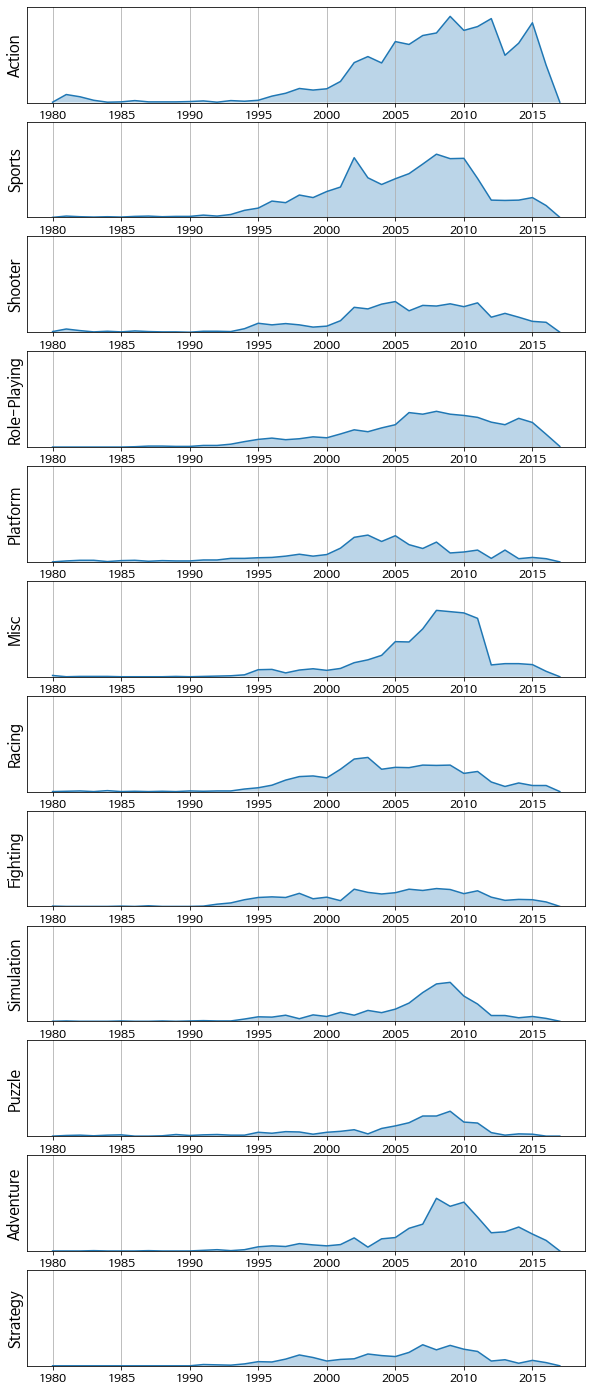

In [61]:
n = 0
plt.figure(figsize=(10,25))
plt.rc('xtick', labelsize=12)

for i in header:
  n += 1

  plt.subplot(12,1,n)
  plt.plot(outer.index, outer[i])
  plt.ylim([0, 300])
  plt.ylabel(i, fontsize=15)
  plt.grid(True)

  ax = plt.gca()
  ax.axes.yaxis.set_ticks([])
  plt.grid(True)
  
  plt.fill_between(outer.index[0:],outer[i][0:], alpha=0.3)


# 연도에 따른 장르별 출시게임 개수

In [62]:
trend

,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,DS,2008.0,Action,40.0,0.0,0.0,0.0
1,Wii,2009.0,Action,170.0,0.0,0.0,10.0
2,PSP,2010.0,Adventure,0.0,0.0,20.0,0.0
3,DS,2010.0,Misc,40.0,0.0,0.0,0.0
4,PS3,2010.0,Platform,120.0,90.0,0.0,40.0
...,...,...,...,...,...,...,...
16593,GC,2006.0,Platform,150.0,40.0,0.0,10.0
16594,PSP,2005.0,Action,10.0,0.0,0.0,0.0
16595,PS3,2015.0,Sports,440.0,190.0,30.0,130.0
16596,PSV,2013.0,Action,50.0,50.0,250.0,30.0


In [63]:
# 연도에 따른 장르별 게임 출고량의 총합 구하기
outer2 = year_only

for i in header:
  is_Genre = trend['Genre'] == i
  temp_G = trend[is_Genre]
  temp_G['sum_sales'] = temp_G.iloc[:,3] + temp_G.iloc[:,4] + temp_G.iloc[:,5] + temp_G.iloc[:,6]

  temp_G2 = temp_G[['Year', 'sum_sales']]
  temp_G2

  grouped_t = temp_G2['sum_sales'].groupby(temp_G2['Year'])

  sum_group_sales = grouped_t.sum().to_frame()
  sum_group_sales.columns = [i]
  sum_group_sales

  outer2 = pd.concat([outer2, sum_group_sales], join='outer', axis=1)

outer2 = outer2.fillna(0)
outer2 = outer2.drop(['Year'], axis=1)
outer2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Action,Sports,Shooter,Role-Playing,Platform,Misc,Racing,Fighting,Simulation,Puzzle,Adventure,Strategy
Year,,,,,,,,,,,,
1980.0,340.0,0.0,7070.0,0.0,0.0,2700.0,0.0,770.0,0.0,0.0,0.0,0.0
1981.0,14790.0,780.0,10020.0,0.0,6920.0,0.0,480.0,0.0,440.0,2250.0,0.0,0.0
1982.0,6500.0,1060.0,3810.0,0.0,5030.0,870.0,1570.0,0.0,0.0,10040.0,0.0,0.0
1983.0,2860.0,3200.0,490.0,0.0,6930.0,2140.0,0.0,0.0,0.0,780.0,400.0,0.0
1984.0,1850.0,6170.0,31100.0,0.0,690.0,1450.0,5950.0,0.0,0.0,3140.0,0.0,0.0


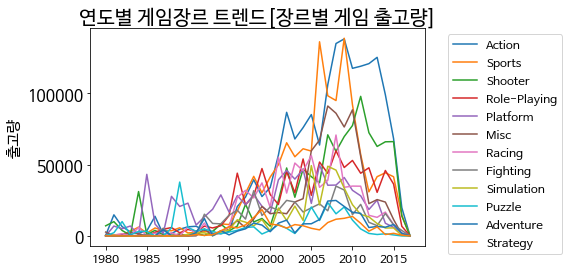

In [64]:
for j in header:
  plt.plot(outer2.index, outer2[j])
  
# plt.xlabel("Year", fontsize=15)
plt.ylabel("출고량", fontsize=15)
plt.legend(header, fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('연도별 게임장르 트렌드[장르별 게임 출고량]', fontsize=20)

plt.show()

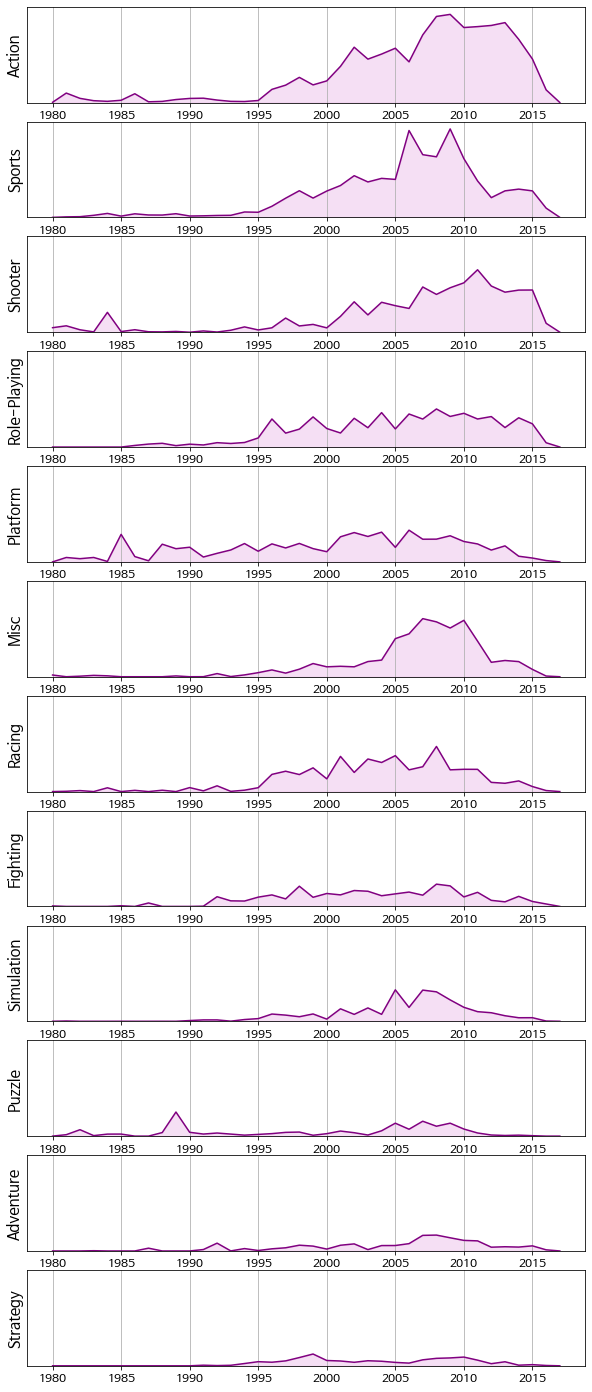

In [78]:
n = 0
plt.figure(figsize=(10,25))

for i in header:
  n += 1

  plt.subplot(12,1,n)
  plt.plot(outer2.index, outer2[i], color = 'purple')
  plt.ylim([0, 150000])
  plt.ylabel(i, fontsize=15)
  
  ax = plt.gca()
  ax.axes.yaxis.set_ticks([])
  plt.grid(True)
  
  plt.fill_between(outer2.index[0:],outer2[i][0:], alpha=0.3, color = '#E098DB')

# 연도에 따른 장르별 출시게임 출고량

In [66]:
# 플랫폼 종류
plat_header = trend['Platform'].unique().tolist()

# plat_header = ['DS', 'Wii', 'PSP', 'PS3', 'PC', 'PS', 'GBA', 'PS4', 'PS2', 'XB', 'X360', 'GC', '3DS', '2600', 'SAT', 'GB', 'NES', 'DC', 'N64',
#                'XOne', 'SNES', 'WiiU', 'PSV', 'GEN', 'SCD', 'WS', 'NG', 'TG16', '3DO', 'GG', 'PCFX']

# 회사별로 묶어서 정렬
plat_header = ['PC','NES','GB','SNES','N64','GBA','GC','DS','Wii','3DS','WiiU','XB','X360','XOne',
               'PS','PS2','PSP','PS3','PSV','PS4','GEN','GG','SCD','SAT','DC','WS','3DO','TG16','PCFX','NG','2600']

In [67]:
outer3 = year_only

for i in plat_header:
  is_Plat = trend['Platform'] == i
  temp_G = trend[is_Plat]
  temp_G['sum_sales'] = temp_G.iloc[:,3] + temp_G.iloc[:,4] + temp_G.iloc[:,5] + temp_G.iloc[:,6]

  temp_G2 = temp_G[['Year', 'sum_sales']]
  temp_G2

  grouped_t = temp_G2['sum_sales'].groupby(temp_G2['Year'])

  sum_group_sales = grouped_t.sum().to_frame()
  sum_group_sales.columns = [i]
  sum_group_sales

  outer3 = pd.concat([outer3, sum_group_sales], join='outer', axis=1)

outer3 = outer3.fillna(0)
outer3 = outer3.drop(['Year'], axis=1)
outer3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,PC,NES,GB,SNES,N64,GBA,GC,DS,Wii,3DS,WiiU,XB,X360,XOne,PS,PS2,PSP,PS3,PSV,PS4,GEN,GG,SCD,SAT,DC,WS,3DO,TG16,PCFX,NG,2600
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1980.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10880.0
1981.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35680.0
1982.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28880.0
1983.0,0.0,10960.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5840.0
1984.0,0.0,50080.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,270.0
1985.0,40.0,53440.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,450.0
1986.0,0.0,35360.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,670.0
1987.0,0.0,19760.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1940.0
1988.0,30.0,45010.0,1430.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,740.0


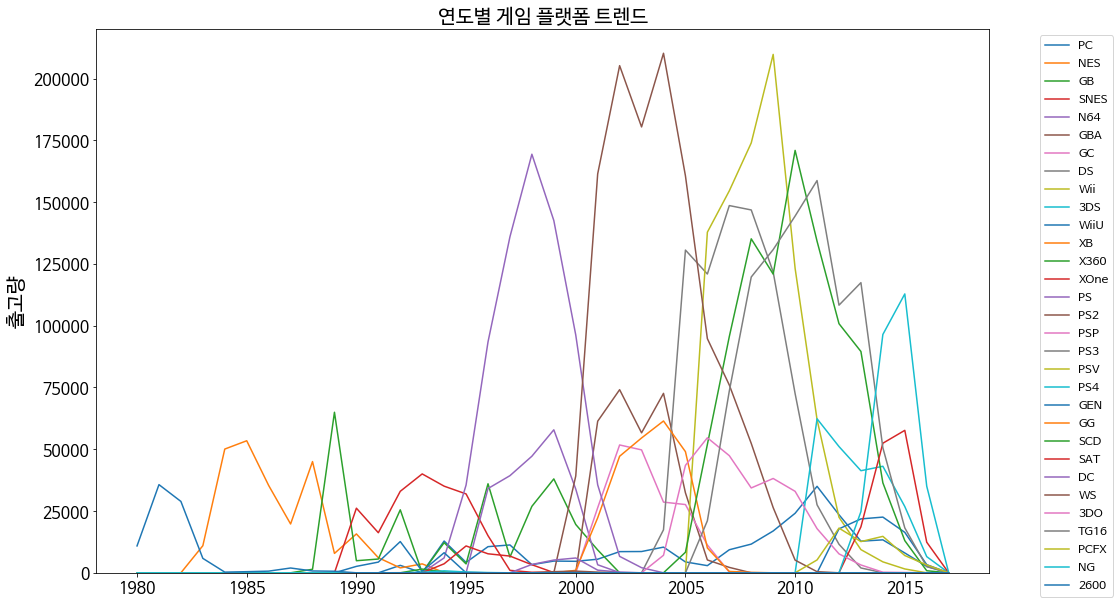

In [98]:
plt.figure(figsize=(16, 10))
plt.rc('ytick', labelsize=16)
plt.rc('xtick', labelsize=16)

for j in plat_header:
  plt.plot(outer3.index, outer3[j])
  
# plt.xlabel("Year", fontsize=15)
plt.ylabel("출고량", fontsize=20)
plt.ylim([0, 220000])
plt.legend(plat_header, fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('연도별 게임 플랫폼 트렌드', fontsize=20)

plt.show()

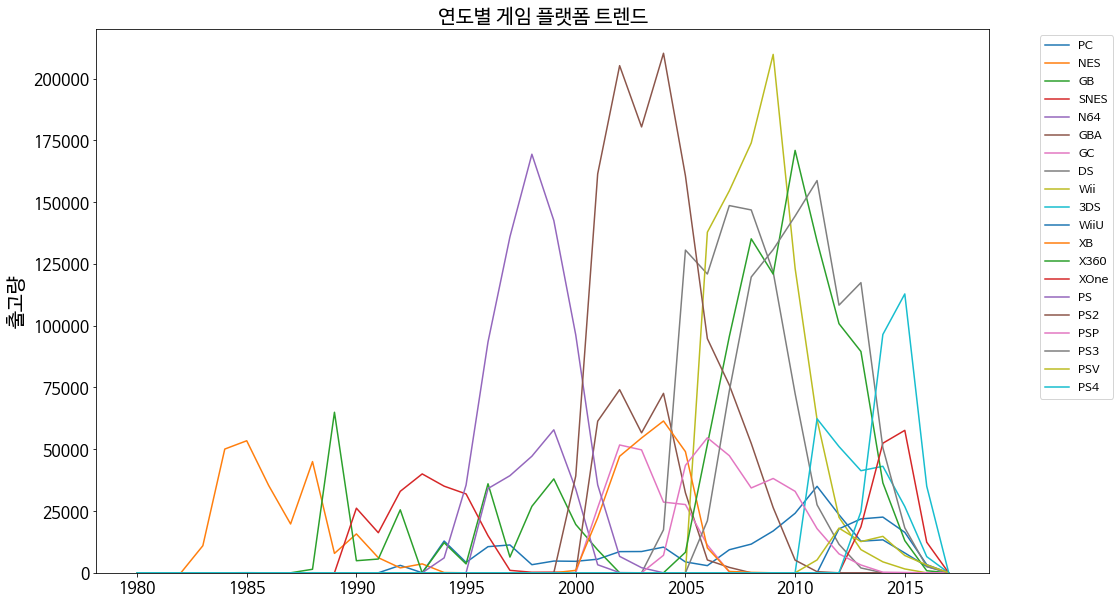

In [149]:
popular = plat_header[0:20]

plt.figure(figsize=(16, 10))
plt.rc('ytick', labelsize=16)
plt.rc('xtick', labelsize=16)

for j in popular:
  plt.plot(outer3.index, outer3[j])
  
# plt.xlabel("Year", fontsize=15)
plt.ylabel("출고량", fontsize=20)
plt.ylim([0, 220000])
plt.legend(popular, fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('연도별 게임 플랫폼 트렌드', fontsize=20)

plt.show()

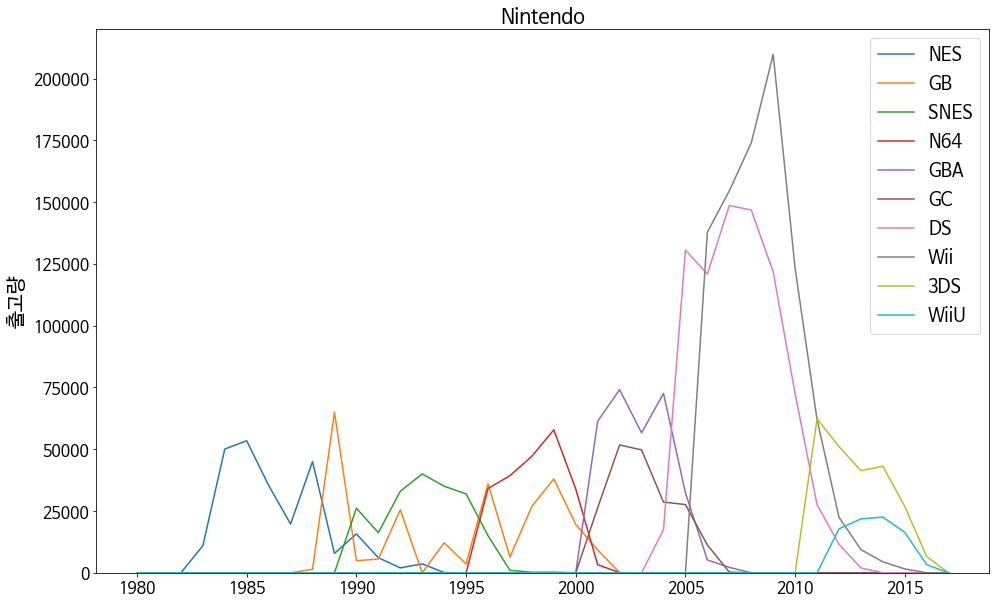

In [88]:
nintendo = plat_header[1:11]

plt.figure(figsize=(16, 10))
plt.rc('ytick', labelsize=16)
plt.rc('xtick', labelsize=16)

for j in nintendo:
  plt.plot(outer3.index, outer3[j])
  
# plt.xlabel("Year", fontsize=15)
plt.ylabel("출고량", fontsize=20)
plt.ylim([0, 220000])
plt.legend(nintendo, fontsize=18)
plt.title('Nintendo', fontsize=20)

plt.show()

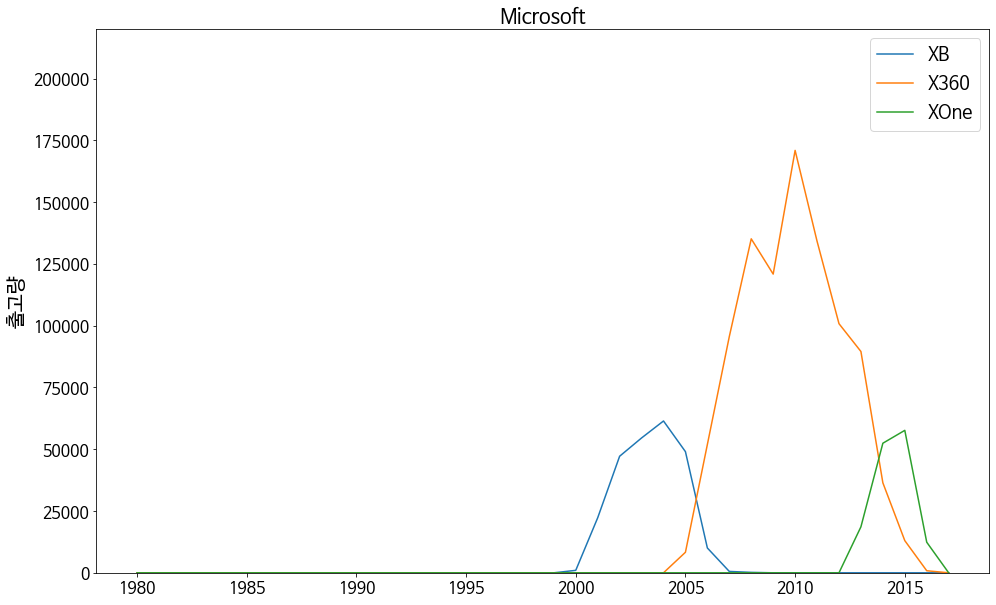

In [90]:
microsoft = plat_header[11:14]

plt.figure(figsize=(16, 10))
plt.rc('ytick', labelsize=16)
plt.rc('xtick', labelsize=16)

for j in microsoft:
  plt.plot(outer3.index, outer3[j])
  
# plt.xlabel("Year", fontsize=15)
plt.ylabel("출고량", fontsize=20)
plt.ylim([0, 220000])
plt.legend(microsoft, fontsize=18)
plt.title('Microsoft', fontsize=20)

plt.show()

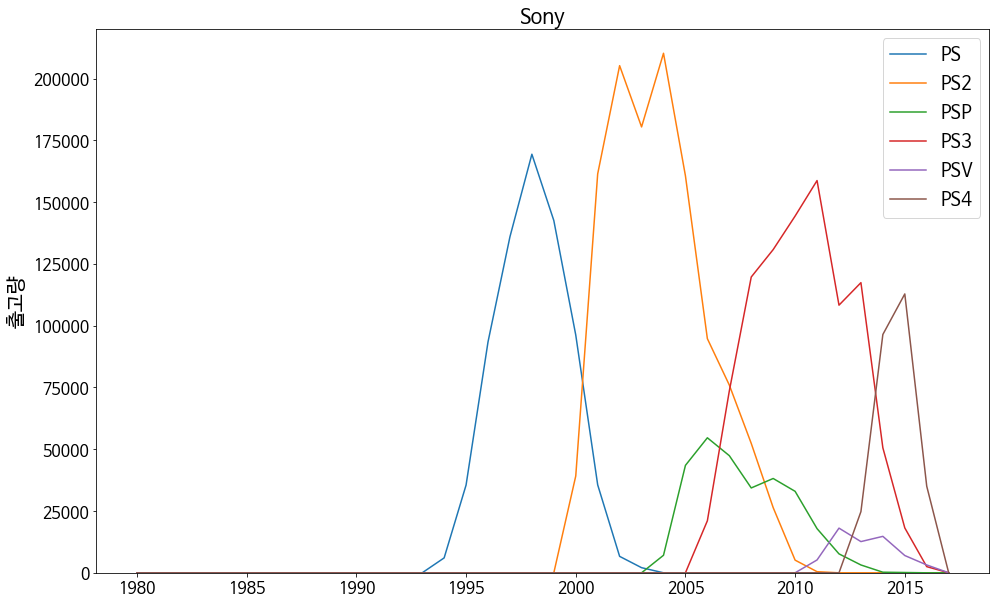

In [92]:
sony = plat_header[14:20]

plt.figure(figsize=(16, 10))
plt.rc('ytick', labelsize=16)
plt.rc('xtick', labelsize=16)

for j in sony:
  plt.plot(outer3.index, outer3[j])
  
# plt.xlabel("Year", fontsize=15)
plt.ylabel("출고량", fontsize=20)
plt.ylim([0, 220000])
plt.legend(sony, fontsize=18)
plt.title('Sony', fontsize=20)

plt.show()

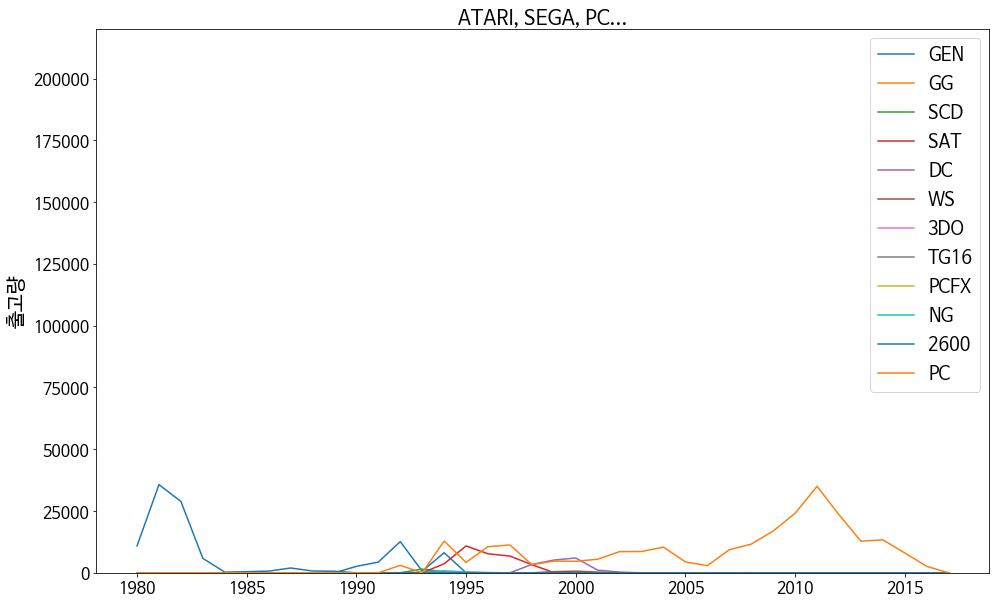

In [97]:
etc = plat_header[20:]
etc.append(plat_header[0])

plt.figure(figsize=(16, 10))
plt.rc('ytick', labelsize=16)
plt.rc('xtick', labelsize=16)

for j in etc:
  plt.plot(outer3.index, outer3[j])
  
# plt.xlabel("Year", fontsize=15)
plt.ylabel("출고량", fontsize=20)
plt.ylim([0, 220000])
plt.legend(etc, fontsize=18)
plt.title('ATARI, SEGA, PC...', fontsize=20)

plt.show()

In [74]:
# 출고량 높은순서로 정렬하기
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40.0,0.0,0.0,0.0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170.0,0.0,0.0,10.0
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,20.0,0.0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40.0,0.0,0.0,0.0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120.0,90.0,0.0,40.0
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,150.0,40.0,0.0,10.0
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,10.0,0.0,0.0,0.0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,440.0,190.0,30.0,130.0
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,50.0,50.0,250.0,30.0


In [130]:
df['total_sales'] = df.iloc[:,6] + df.iloc[:,7] + df.iloc[:,8] + df.iloc[:,9]
top = df[['Name', 'Platform', 'Year', 'Genre', 'total_sales']]
top20 = top.sort_values(by=["total_sales"], ascending=[False]).iloc[0:20]
top20 = top20.reset_index()
top20 = top20.drop(['index'], axis=1)
top20.index=top20.index+1
top20.index.name="Ranking"
top20

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Name,Platform,Year,Genre,total_sales
Ranking,,,,,
1,Wii Sports,Wii,2006.0,Sports,82740.0
2,Super Mario Bros.,NES,1985.0,Platform,40240.0
3,Mario Kart Wii,Wii,2008.0,Racing,35830.0
4,Wii Sports Resort,Wii,2009.0,Sports,33000.0
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,31380.0
6,Tetris,GB,1989.0,Puzzle,30260.0
7,New Super Mario Bros.,DS,2006.0,Platform,30010.0
8,Wii Play,Wii,2006.0,Misc,29010.0
9,New Super Mario Bros. Wii,Wii,2009.0,Platform,28610.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

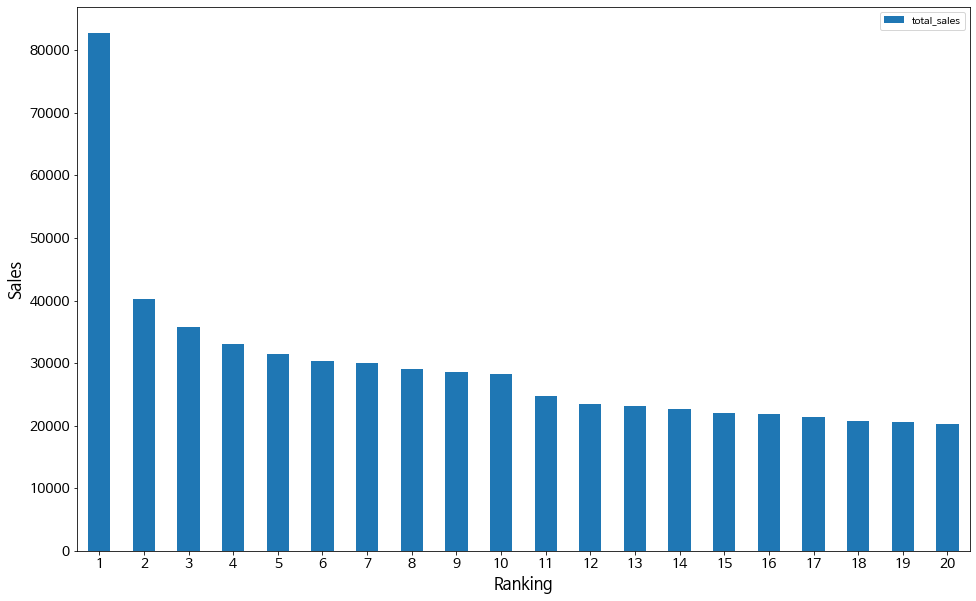

In [143]:
# top20 = top20.set_index(top20['Platform'])

top20[['Name', 'total_sales']].plot(kind='bar', figsize=[16, 10], fontsize=14)
plt.xlabel('Ranking', fontsize=16)
plt.ylabel("Sales", fontsize=16)
plt.xticks(rotation=0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

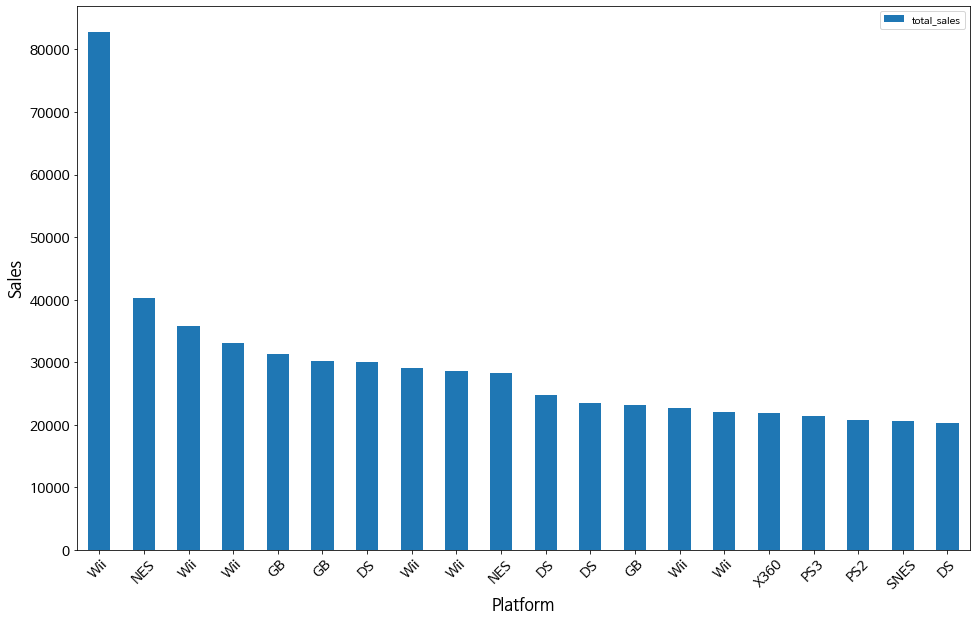

In [113]:
top20[['Name', 'total_sales']].plot(kind='bar', figsize=[16, 10], fontsize=14)
plt.xlabel("Platform", fontsize=16)
plt.ylabel("Sales", fontsize=16)
plt.xticks(rotation=45)